# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

> **Напоминание**
>
>Минимальные баллы для получения зачёта по этой работе - **1 балл**. Если вы не набираете тут 1 балл, то по всему курсу вы получаете неуд (см. слайды с вводной презентации).

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [26]:
%%bash
gdown 1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3

Downloading...
From: https://drive.google.com/uc?id=1e-Q_15W7ExExQarKqgjrtoO-LHi9oJs3
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 224MB/s]


Начнем с необходимых приготовлений.

In [27]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла *"coins.csv"*. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [28]:
coins = pd.read_csv("coins.csv")  

Посмотрим что получилось

In [29]:
coins['date']

0        2013-04-28
1        2013-04-28
2        2013-04-29
3        2013-04-29
4        2013-04-30
            ...    
37583    2018-06-06
37584    2018-06-06
37585    2018-06-06
37586    2018-06-06
37587    2018-06-06
Name: date, Length: 37588, dtype: object

Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [30]:
coins['name'].value_counts()

Bitcoin         1866
Litecoin        1866
Dogecoin        1635
Vertcoin        1599
DigiByte        1582
                ... 
Zilliqa          133
Polymath         125
Centrality        86
Loom Network      85
Cortex            52
Name: name, Length: 70, dtype: int64

### 2. За какой период данные мы имеем? (0.4 балла)

In [31]:
print(coins['date'].max(), coins['date'].min())

2018-06-06 2013-04-28


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [32]:
coins.info()
# так как количесвто non-null элементов в столбцах price, txCount, txVolume, activeAddresses меньше общего количества строк, значит там есть пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37588 entries, 0 to 37587
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             37588 non-null  object 
 1   price            37261 non-null  float64
 2   txCount          36068 non-null  float64
 3   txVolume         35758 non-null  float64
 4   activeAddresses  36068 non-null  float64
 5   symbol           37588 non-null  object 
 6   name             37588 non-null  object 
 7   open             37588 non-null  float64
 8   high             37588 non-null  float64
 9   low              37588 non-null  float64
 10  close            37588 non-null  float64
 11  volume           37588 non-null  float64
 12  market           37588 non-null  float64
dtypes: float64(10), object(3)
memory usage: 3.7+ MB


### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [33]:
# print(coins[coins['price'] == coins['price'].max()]['name'])
# print(coins[coins['price'] == coins['price'].max()]['date'])
print(coins.iloc[25971])



date                       2017-12-17
price                         19475.8
txCount                      391725.0
txVolume           37469204186.099998
activeAddresses             1176110.0
symbol                            BTC
name                          Bitcoin
open                          19475.8
high                          20089.0
low                           18974.1
close                         19140.8
volume                  13314600000.0
market                 326141000000.0
Name: 25971, dtype: object


### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

In [34]:
a = coins.groupby('name')['market'].sum().sort_values()
print(a[:1], a[-1:])


name
KingN Coin    10608251.0
Name: market, dtype: float64 name
Bitcoin    5.743947e+13
Name: market, dtype: float64


name
Bitcoin             5.743947e+13
Ethereum            1.958822e+13
Bitcoin Cash        5.885986e+12
Litecoin            2.667419e+12
Cardano             1.769282e+12
EOS                 1.428563e+12
Dash                1.406197e+12
NEM                 1.357664e+12
Stellar             1.275917e+12
NEO                 1.241397e+12
Ethereum Classic    8.035724e+11
other               7.411292e+12
Name: market, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f538dfc2ac0>],
      dtype=object)

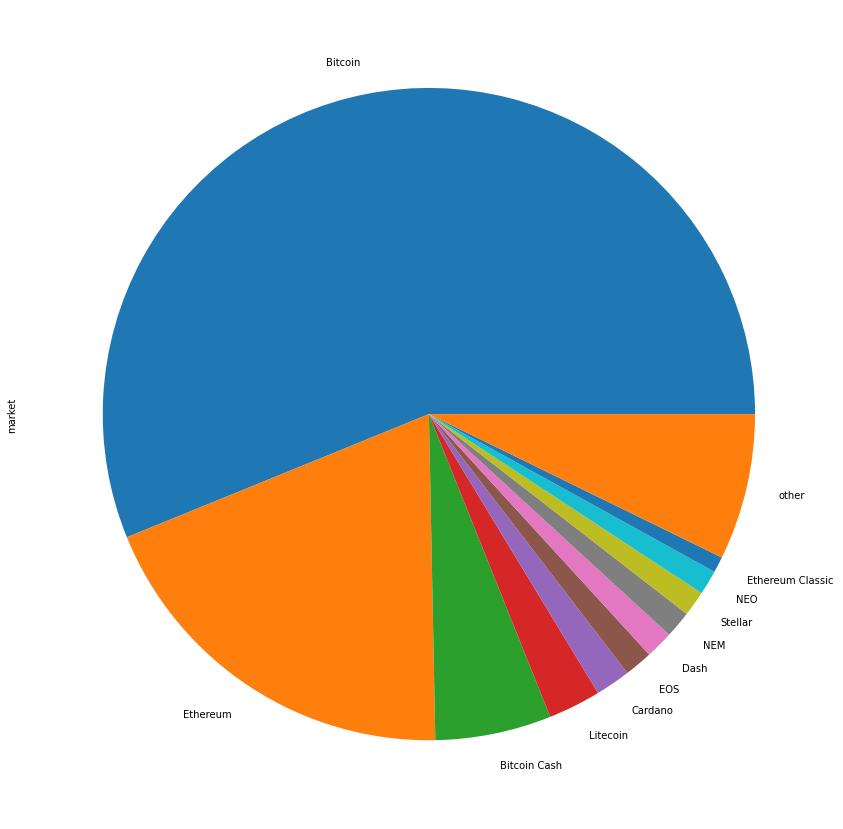

In [35]:
a = coins.groupby('name')['market'].sum().sort_values()[69::-1]
b = a[:11]
b['other'] = a[11:].sum()
print(b)
b.plot.pie(subplots = True, figsize = (15, 15))

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `matplotlib.finance.candlestick_ohlc` (`mpl_finance.candlestick_ohlc`), но можно и без него.

In [36]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
  one_coin = coins.loc[coins['symbol'] == symbol].sort_values(by = "date")
  cur = one_coin.loc[(coins['date'] >= start_date) & (coins['date'] <= end_date)]
  x = list(cur['date'])
  y_open_val = list(cur['open'])
  y_close_val = list(cur['close'])
  y_lowest = list(cur['low'])
  y_highest = list(cur['high'])
  fig, axs = plt.subplots()
  axs.plot(x, y_open_val,
        color = 'blue',
        label = 'open price')
  axs.plot(x, y_close_val,
        color = 'red',
        label = 'close price')
  axs.plot(x, y_lowest,
        color = 'green',
        label = 'low price')
  axs.plot(x, y_highest,
        color = 'orange',
        label = 'high price')
  axs.set_xlabel('date')
  axs.set_ylabel('price [USD]')

  lengh = len(cur)

  axs.xaxis.set_major_locator(mpl.ticker.MultipleLocator(lengh/25))
  axs.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(lengh/100))
  axs.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))

  axs.set_title('График зависимости цены монеты в течение дня от даты', pad=30)

  axs.legend()

  axs.grid(which='major')

  axs.grid(which='minor',
        color = 'gray',
        linestyle = ':')
  

  fig.set_figwidth(30)
  fig.set_figheight(10)

  plt.show()


    

Посмотрим, что получилось:

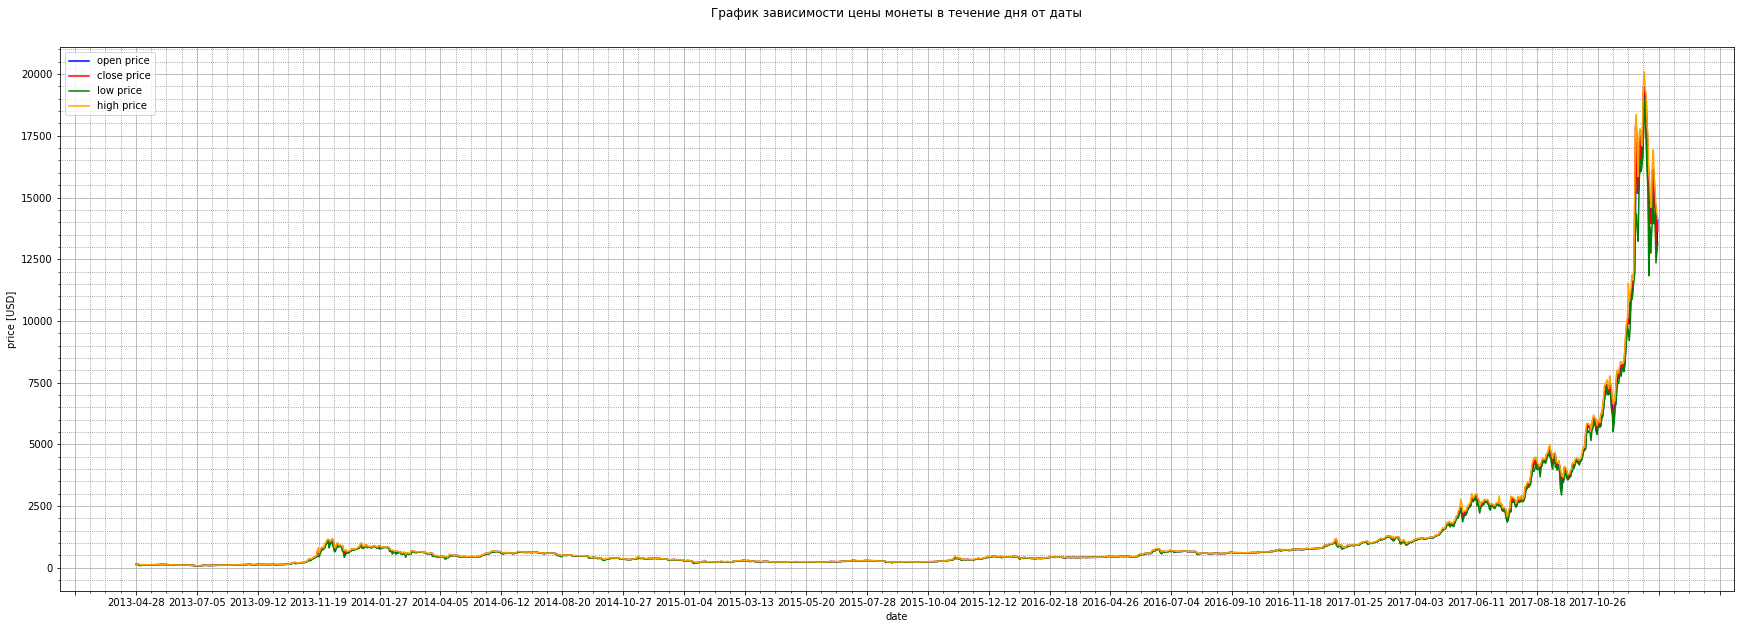

In [37]:
plot_fancy_price_action(coins=coins, symbol='BTC', start_date='2013-01-01', end_date='2018-01-01') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс). 

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [47]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
  pd.options.mode.chained_assignment = None
  one_coin = coins.loc[coins['symbol'] == symbol].sort_values(by = "date")
  cur = one_coin.loc[(coins['date'] >= start_date) & (coins['date'] <= end_date)]
  # cur['pnd'] = cur['high']/(np.maximum(cur['open'], cur['close']))
  cur.loc[:,'pnd'] = cur['high']/(np.maximum(cur['open'], cur['close']))
  cur = cur.sort_values(by = 'pnd')
  print(cur[-1:]['name'], cur[-1:]['date'], cur[-1:]['pnd'])



In [76]:
one_coin = coins.loc[coins['symbol'] == 'BTC'].sort_values(by = "date")
cur = one_coin.loc[(coins['date'] >= '2017-06-01') & (coins['date'] <= '2018-06-01')]
cur.loc[:,'pnd'] = cur['high']/(np.maximum(cur['open'], cur['close']))
cur = cur.sort_values(by = 'pnd')
cur[-1:]

,date,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market,pnd
24860,2017-11-29,10077.4,397917.0,2.845830e+10,1131747.0,BTC,Bitcoin,10077.4,11517.4,9601.03,9888.61,1.156880e+10,1.683670e+11,1.142894


In [71]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

24860    Bitcoin
Name: name, dtype: object 24860    2017-11-29
Name: date, dtype: object 24860    1.142894
Name: pnd, dtype: float64


Сравните эти значения для разных монет:

In [78]:
coins['pnd'] = coins['high']/(np.maximum(coins['open'], coins['close']))
c = pd.DataFrame(coins.groupby('name')['pnd'].max().sort_values(ascending=False)[:])
c


,pnd
name,
Veritaseum,33.549254
DigiByte,32.119149
FunFair,12.490562
TRON,9.651010
Bitmark,7.177933
...,...
Centrality,1.177753
Binance Coin,1.176080
Nebulas,1.175824


## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени. 

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [80]:
def compute_roi(coins, investments, start_date, end_date):
  sum_invest = 0
  sum_end = 0
  arr = coins
  arr.sort_values(by = 'date')
  for symbol in investments: 
    val_0 = investments[symbol]
    sum_invest += val_0
    start_id = arr.index[(arr.date == start_date) & (arr.symbol == symbol)].tolist()
    end_id = arr.index[(arr.date == end_date) & (arr.symbol == symbol)].tolist()
    num_coin = val_0 / (coins.loc[start_id[0]]['price'])
    val_end = num_coin * coins.loc[end_id[0]]['price']
    sum_end += val_end
  ROI = (sum_end - sum_invest) / sum_invest
  print(ROI)


In [81]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

-0.035569133065275614


In [82]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

51.28330296529592


## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто: 

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [85]:
def plot_bollinger_bands(coins, symbol, window, width):
  one_coin = coins.loc[coins['symbol'] == symbol].sort_values(by = "date")
  one_coin['SMA'] = one_coin['price'].rolling(window).mean()
  one_coin['std'] = one_coin['price'].rolling(window).std()
  # one_coin['SMA'] = one_coin['SMA'] / window
  one_coin['upper_bound'] = one_coin['SMA'] + width * one_coin['std']
  one_coin['lower_bound'] = one_coin['SMA'] - width * one_coin['std']
  # print(one_coin)
  x = list(one_coin['date'])
  y_val = list(one_coin['price'])
  y_sma = list(one_coin['SMA'])
  y_ub = list(one_coin['upper_bound'])
  y_lb = list(one_coin['lower_bound'])
  fig, axs = plt.subplots()
  axs.plot(x, y_val,
        color = 'blue',
        label = 'price')
  axs.plot(x, y_sma,
        color = 'red',
        label = 'скользящее среднее')
  axs.plot(x, y_ub,
        color = 'green',
        linestyle = ':',
        label = 'границы Боллинджера')
  axs.plot(x, y_lb,
        color = 'green',
        linestyle = ':')
  axs.set_xlabel('date')
  axs.set_ylabel('price [USD]')

  lengh = len(one_coin)

  axs.xaxis.set_major_locator(mpl.ticker.MultipleLocator(lengh/25))
  axs.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(lengh/100))
  axs.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(500))

  axs.set_title('График зависимости цены монеты ,от даты', pad=30)

  axs.legend(loc = 'best')

  axs.grid(which='major')

  axs.grid(which='minor',
        color = 'gray',
        linestyle = ':')
  

  fig.set_figwidth(30)
  fig.set_figheight(10)

  plt.show()


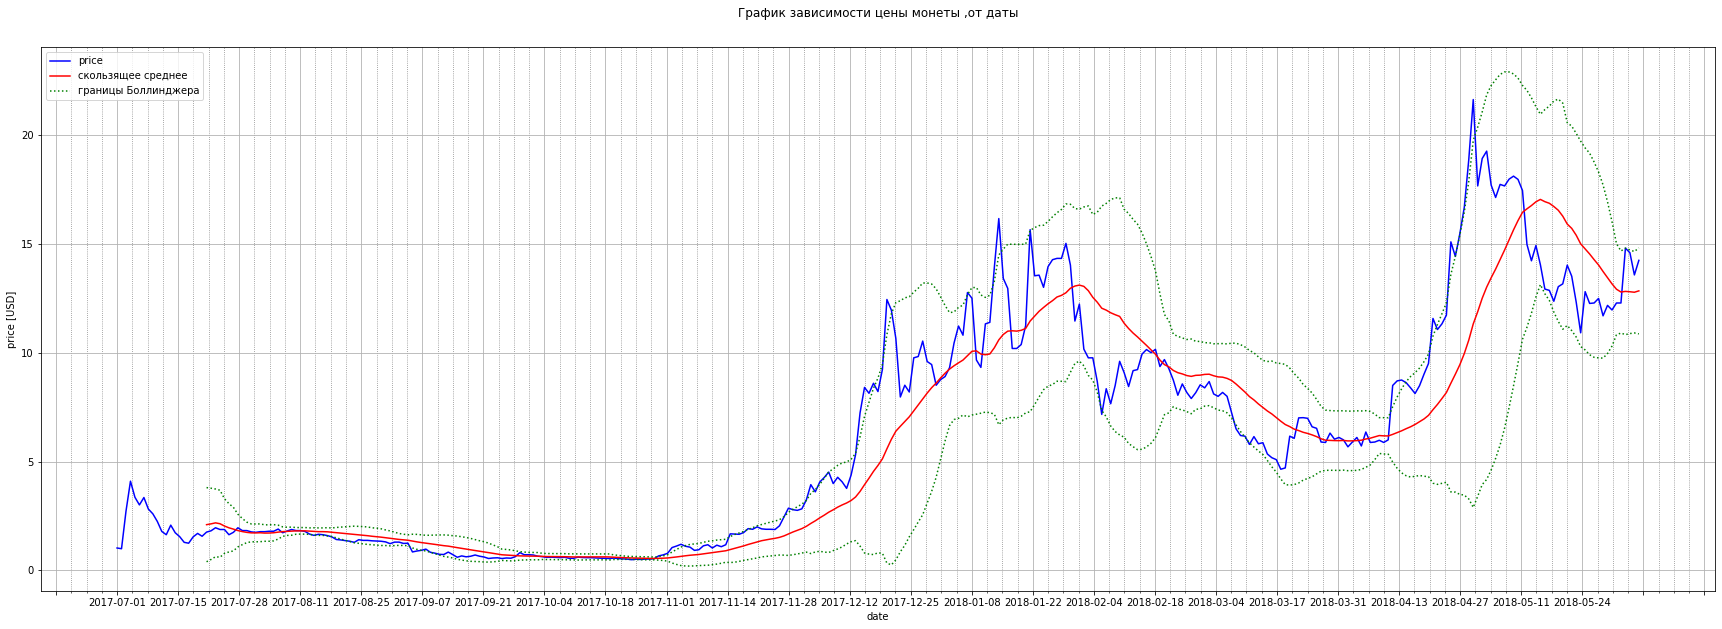

In [86]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

по графику видно, что средняя цена в основном лежит в границах Боллинджера, а если в какой то окрестности выходит, то эти пики по продолжительности в днях не значительные, то есть можно сказать, что он отражается 

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка. 

При этом используйте данные начиная с 2017-07-01.

In [90]:
def plot_coins_capitalizations(coins, symbols, start_date):
      arr = coins
      arr.sort_values(by = 'date')
      arr = arr[(arr.date >= '2017-07-01')]
      arr['common_market'] = arr.groupby('date')['market'].transform('sum')
      
      x_0 = list(arr[arr.symbol == symbols[0]]['date'])
      x_1 = list(arr[arr.symbol == symbols[1]]['date'])
      x_2 = list(arr[arr.symbol == symbols[2]]['date'])
      x_3 = list(arr[arr.symbol == symbols[3]]['date'])
      x_4 = list(arr[arr.symbol == symbols[4]]['date'])
      x_5 = list(arr[arr.symbol == symbols[5]]['date'])
      
      y_0 = list(arr[arr.symbol == symbols[0]]['market'] / arr[arr.symbol == symbols[0]]['common_market'])
      y_1 = list(arr[arr.symbol == symbols[1]]['market'] / arr[arr.symbol == symbols[1]]['common_market'])
      y_2 = list(arr[arr.symbol == symbols[2]]['market'] / arr[arr.symbol == symbols[2]]['common_market'])
      y_3 = list(arr[arr.symbol == symbols[3]]['market'] / arr[arr.symbol == symbols[3]]['common_market'])
      y_4 = list(arr[arr.symbol == symbols[4]]['market'] / arr[arr.symbol == symbols[4]]['common_market'])
      y_5 = list(arr[arr.symbol == symbols[5]]['market'] / arr[arr.symbol == symbols[5]]['common_market'])
      
      common = arr[(arr.symbol == symbols[0]) | (arr.symbol == symbols[1]) | (arr.symbol == symbols[2]) | (arr.symbol == symbols[3]) | (arr.symbol == symbols[4]) | (arr.symbol == symbols[5])]
      common['common_market'] = common.groupby('date')['market'].transform('sum')

      x_6 = list(common['date'])
      y_6 = list(common['common_market'])

      fig, axs = plt.subplots(2)
      axs[0].plot(x_0, y_0,
            color = 'blue',
            label = f'доля капитализации {symbols[0]}')
      axs[0].plot(x_1, y_1,
            color = 'red',
            label = f'доля капитализации {symbols[1]}')
      axs[0].plot(x_2, y_2,
            color = 'green',
            label = f'доля капитализации {symbols[2]}')
      axs[0].plot(x_3, y_3,
            color = 'yellow',
            label = f'доля капитализации {symbols[3]}')
      axs[0].plot(x_4, y_4,
            color = 'orange',
            label = f'доля капитализации {symbols[4]}')
      axs[0].plot(x_5, y_5,
            color = 'purple',
            label = f'доля капитализации {symbols[5]}')            
      axs[0].set_xlabel('date')
      axs[0].set_ylabel('доля капитализации валюты от общего рынка')

      axs[1].plot(x_6, y_6)
      axs[1].set_xlabel('дата')
      axs[1].set_ylabel('общая капитализация валют [USD}')

      lengh = len(arr)

      axs[0].xaxis.set_major_locator(mpl.ticker.MultipleLocator(lengh/500))
      axs[0].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(lengh/1000))
      axs[0].yaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.05))
      axs[1].xaxis.set_major_locator(mpl.ticker.MultipleLocator(lengh/500))
      axs[1].xaxis.set_minor_locator(mpl.ticker.MultipleLocator(lengh/1000))
      axs[1].yaxis.set_major_locator(mpl.ticker.MultipleLocator(20000000000))

      axs[0].set_title('График зависимости доли капитализации валюты от общего рынка от даты', pad=30)
      axs[1].set_title('График зависимости общей капитализации валют от даты', pad=30)

      axs[0].legend()

      axs[0].grid(which='major')
      axs[0].grid(which='minor',
            color = 'gray',
            linestyle = ':')
      
      axs[1].grid(which='major')
      axs[1].grid(which='minor',
            color = 'gray',
            linestyle = ':')

      fig.set_figwidth(30)
      fig.set_figheight(25)

      plt.show()

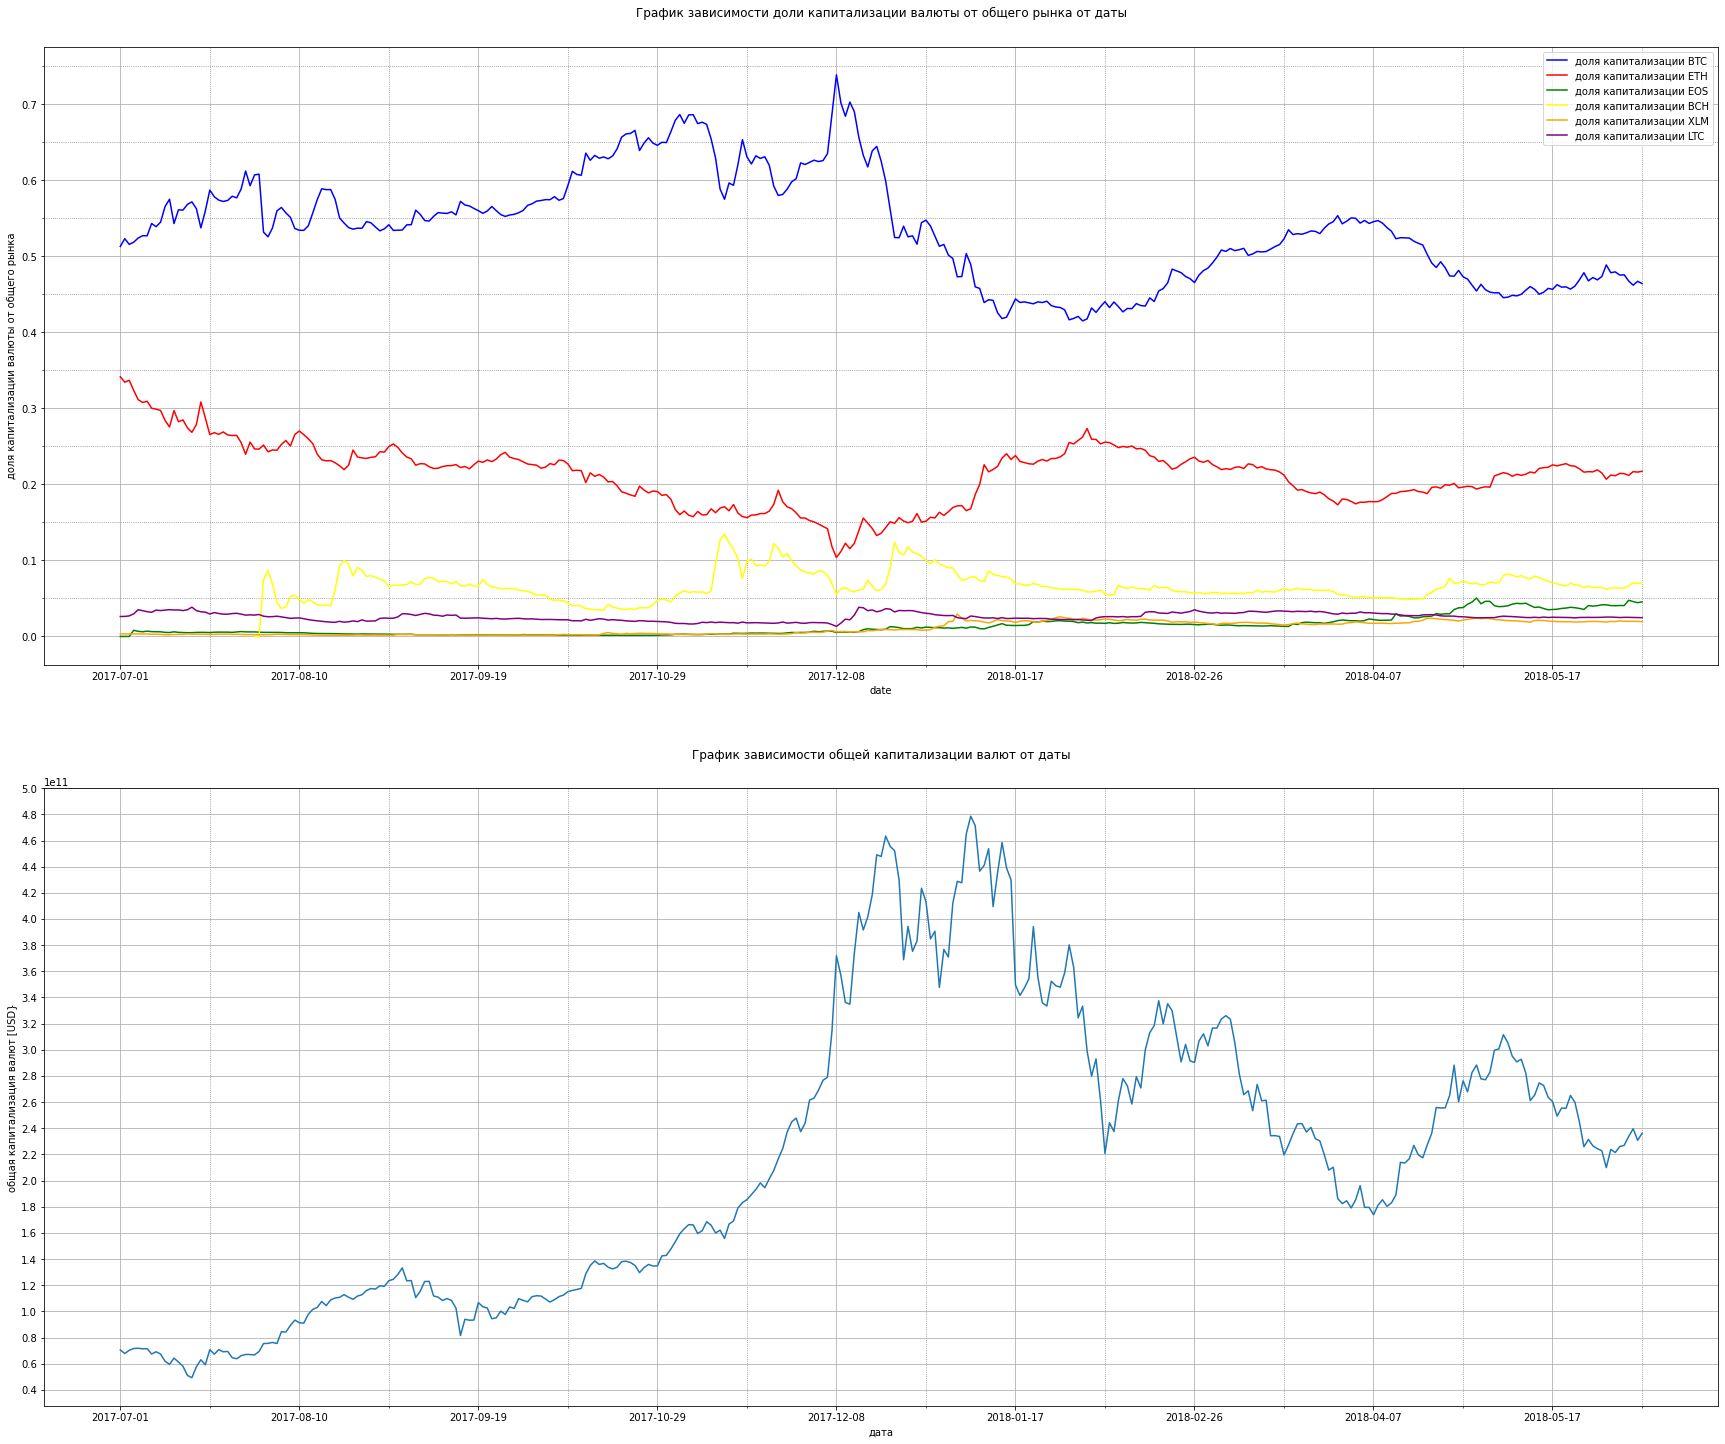

In [91]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

по графику видно, что при повышении доли капитализации биткоина доли капитализации остальных падают (например в окрестности даты 2017-12-08) и аналогичная обратная зависимость при понижении 

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

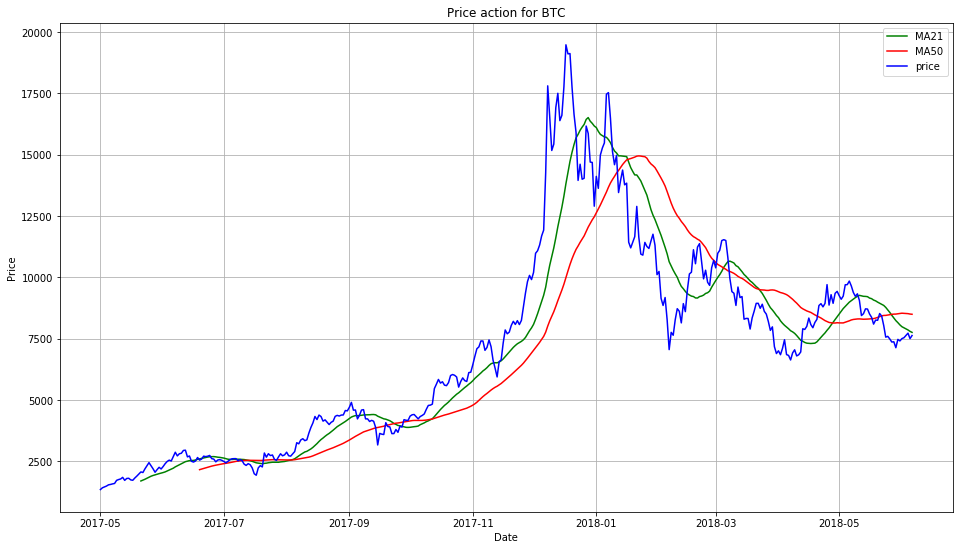

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности 

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.